<h1 style="color:blue;">PROJETO: Análise e detecção de fraudes em transações imobiliárias</h1>
<h2 style="color:lightblue;">Parte 3</h2>

Nesta última parte, vamos aplicar as técnicas de detecção de fraude nos nossos dados, existem diversas técnicas para este tipo de análise e a aplicaremos aqui uma abordagem via aprendizado **não supervisionado** criando scores (pontuações) de fraude para cada transação imobiliária.

Serão criados 2 scores com técnicas diferentes de Machine Learning e depois vamos unir os scores e apresentar o score final, na primeira vamos utilizar o PCA para redução da dimensionalidade, sem perdermos informações dos dados e aplicamos um cálculo matemático, depois vamos aplicar deep learning com técnica de autoencoder e aplicamos o cálculo matemático.

Por fim uniremos os dois scores e calcularemos o score final, a Engenharia de atributos (Feature Engineering) será parte fundamental do Processo.

# Sumário

**<p style="color:lightgrey;">`Parte 1:` Análise Exploratória**</p>
<p style="color:lightgrey;">
   1. Importando as bibliotecas e carregando os dados<br>
   2. Análise Exploratória dos dados<br>
   3. Conclusão<br>
</p>

**<p style="color:lightgrey;">`Parte 2:` Limpeza, transformação e Feature Engineering**</p>
<p style="color:lightgrey;">
   1. Importando as bibliotecas e carregando os dados<br>
   2. Limpeza e transformação dos dados<br>
      2.1 Limpando valores ausentes da variável: ZIP<br>
      2.2 Limpando valores ausentes das variáveis: FULLVAL, AVLAND, AVTOT, BLDFRONT, BLDDEPTH, LTFRONT e LTDEPTH<br>
      2.3 Limpando valores ausentes da variável: STORIES<br>
   3. Engenharia de Atributos<br>
   4. Conclusão<br>
</p>

**`Parte 3:` Modelagem e calculo do Score de Fraude**
   1. Importando as bibliotecas e carregando os dados<br>
   2. Padronização das variáveis<br>
   3. Aplicando PCA<br>
      3.1. Aplicação da Escala Z em componentes PCA Padronizados<br>
      3.2 Calculando o Fraud Score 1<br>
   4. Aplicacando Deep Learning<br>
      4.1 Construção do Modelo<br>
      4.2 Avaliação do modelo<br>
      4.3 Calculando o Fraud Score 2<br>
   5. Calculando o Score Final do Score de Fraude e apresentando os Resultados<br>
   6. Conclusão<br>
   7. Referências<br>

## 1. Importando as bibliotecas e carregando os dados

In [1]:
# imports
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# importando o dataset
df = pd.read_csv('Dados/dataset_final.csv')

# verificando as primeiras linhas
df.head()

C:\Users\carlo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,6,9,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,...,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_ALL,ind2_media_ind2_grupo_ALL,ind3_media_ind3_grupo_ALL,ind4_media_ind4_grupo_ALL,ind5_media_ind5_grupo_ALL,ind6_media_ind6_grupo_ALL,ind7_media_ind7_grupo_ALL,ind8_media_ind8_grupo_ALL,ind9_media_ind9_grupo_ALL
0,0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,...,0.439817,0.119039,0.290093,0.155256,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614
1,1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,...,15.932063,58.821734,2.627102,5.624045,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196
2,2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,...,0.871467,0.761622,0.431099,0.307629,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538
3,3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,...,4.179211,0.260998,1.378254,1.475269,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571
4,4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,...,536.032968,1.946484,88.388624,189.220556,26.809043,540.926631,997.873441,9.820611,319.351382,701.536801


In [3]:
# verificando as dimensões
df.shape

(1070994, 69)

In [4]:
# checando as colunas
df.columns

Index(['Unnamed: 0', 'RECORD', 'BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT',
       'OWNER', 'BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES',
       'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR',
       'ZIP', 'EXMPTCL', 'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2',
       'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE',
       'ind1_media_ind1_grupo_ZIP', 'ind2_media_ind2_grupo_ZIP',
       'ind3_media_ind3_grupo_ZIP', 'ind4_media_ind4_grupo_ZIP',
       'ind5_media_ind5_grupo_ZIP', 'ind6_media_ind6_grupo_ZIP',
       'ind7_media_ind7_grupo_ZIP', 'ind8_media_ind8_grupo_ZIP',
       'ind9_media_ind9_grupo_ZIP', 'ind1_media_ind1_grupo_TAXCLASS',
       'ind2_media_ind2_grupo_TAXCLASS', 'ind3_media_ind3_grupo_TAXCLASS',
       'ind4_media_ind4_grupo_TAXCLASS', 'ind5_media_ind5_grupo_TAXCLASS',
       'ind6_media_ind6_grupo_TAXCLASS', 'ind7_media_ind7_grupo_TAXCLASS',
       'ind8_media_ind8_grupo_TAXCLASS', 'ind9_media_ind9_grupo_TAXCLASS',
       'i

In [5]:
# verificando os tipos dos dados
df.dtypes

Unnamed: 0                     int64
RECORD                         int64
BBLE                          object
B                              int64
BLOCK                          int64
                              ...   
ind5_media_ind5_grupo_ALL    float64
ind6_media_ind6_grupo_ALL    float64
ind7_media_ind7_grupo_ALL    float64
ind8_media_ind8_grupo_ALL    float64
ind9_media_ind9_grupo_ALL    float64
Length: 69, dtype: object

## 2. Padronização das variáveis

Para iniciar nosso trabalho por aqui, vamos padronizar as variáveis que criamos na etapa de Feature Engineering, então selecionamos somente essas variáveis.

In [6]:
# selecionando as últimas variáveis
cols_created = df.iloc[:, -36:].columns

Agora vamos utilizar essas variáveis para aplicar a padronização com StandardScaler()

In [7]:
# cria o objeto scaler
scaler = preprocessing.StandardScaler()

# aplica o scaler às variáveis em formato array
arr_scaled = scaler.fit_transform(df.iloc[:, -36:])

# cria o dataframe
df_scaled = pd.DataFrame(arr_scaled, columns = cols_created)

# visualizando as primeiras linhas
df_scaled.head()

,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,...,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_ALL,ind2_media_ind2_grupo_ALL,ind3_media_ind3_grupo_ALL,ind4_media_ind4_grupo_ALL,ind5_media_ind5_grupo_ALL,ind6_media_ind6_grupo_ALL,ind7_media_ind7_grupo_ALL,ind8_media_ind8_grupo_ALL,ind9_media_ind9_grupo_ALL
0,-0.217642,-0.058083,-0.061874,-0.063673,-0.024200,-0.031534,-0.087295,-0.024959,-0.029884,-0.141901,...,-0.009502,-0.040192,-0.045643,-0.049198,-0.012697,-0.002692,-0.007698,-0.030665,0.000833,-0.006849
1,16.190473,0.310943,0.975171,2.574879,0.011906,0.047434,7.279154,0.156815,0.509155,15.921190,...,0.253274,2.637975,0.104614,0.269305,6.240320,0.021270,0.047501,22.708403,0.147039,0.320354
2,-0.038033,-0.035817,-0.032979,0.095315,0.003099,-0.014292,-0.006659,-0.013991,-0.014865,0.033932,...,-0.002180,-0.010875,-0.036577,-0.040324,0.364084,0.015425,0.004353,0.218246,0.009655,0.002268
3,-0.177963,0.113743,0.188440,-0.015991,0.102335,0.080045,-0.069481,0.059679,0.100225,-0.103056,...,0.053925,-0.033715,0.024320,0.027680,0.100303,0.081283,0.070297,0.024324,0.068910,0.072129
4,0.293151,13.853133,35.790522,0.450496,10.338813,17.232588,0.142026,6.827386,18.605602,0.358152,...,9.075113,0.043181,5.618616,10.961996,1.205816,6.874744,12.060259,0.677213,5.512374,11.305086


## 3. Aplicando PCA

Após essa padronização, podemos aplicar o algoritmo PCA

In [8]:
# instanciando o modelo
pca_model = PCA()

# treinando o modelo
pca = pca_model.fit(df_scaled)

Para o algoritmo do PCA precisamos saber o valor de componentes principais. E para fazer isso devemos verificar a soma cumulativa da variância explicada pelo modelo.

Podemos observar que o modelo foi treinado com nenhum parâmetro, com isso ele irá buscar a maior quantidade possíveis de componentes e é isso que nós queremos nesse momento.

Mas o que significa essa Variância Explicada?<br>
Quer dizer que temos 36 variáveis no nosso modelo, quando aplico o PCA, ele irá buscar fazer um tipo de agrupamento, reduzindo minha dimensionalidade, porém as informações contidas devem ser a mesma do conjunto todo.

Por exemplo, podemos notar no gráfico abaixo, se eu subir uma linha no número 5 até cruzar com a minha curva que o ponto será aproximadamente 0.9 ou 90%, quer dizer que com 5 componentes principais meu modelo explica aproximadamente 90% da variância dos dados, ou seja, 90% das informações contidas nas 36 variáveis.

Mas é o suficiente?<br>
Não exatamente, pois preferimos o máximo de informações. Selecionando 10 componentes, podemos ver que está bem próximo dos 100%, então 10 componentes principais conseguem explicar praticamente todas as informações contidas nas 36 variáveis, pois a perda será mínima e é aceitável.

Com isso reduzimos a dimensionalidade do modelo sem perder informação (ou uma perda bem pequena), então podemos observar no gráfico que acima de 10 componentes, o valor da variância se mantém praticamente constante, então se eu escolher quanquer quantidade de componentes, acima disso, não fará tanta diferença, além de poder estar induzindo o algoritmo à aprender demais, levando à overfitting e ter desperdício de recursos computacionais.

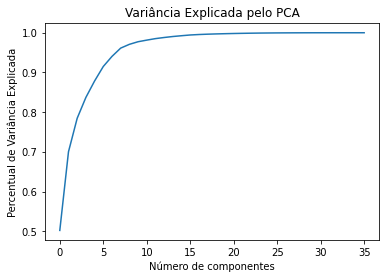

In [9]:
# criando a visualização
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada pelo PCA')
plt.show()

Como vimos, vamos ficar com 10 componentes, pois vimos que é o suficiente para nossa aplicação, treinaremos o modelo novamente com esses 10 componentes e aplicamos ao nosso conjunto de dados.

In [10]:
# instanciando o modelo com o parâmetro do número de componentes
pca = PCA(n_components = 10)

# fit e transform do modelo
arr_pca = pca.fit_transform(df_scaled)

In [11]:
# criando a lista de colunas do PCA
cols_PCA = ['PCA' + str(i) for i in range(1,11)]

# exibindo a lista de colunas
cols_PCA

['PCA1',
 'PCA2',
 'PCA3',
 'PCA4',
 'PCA5',
 'PCA6',
 'PCA7',
 'PCA8',
 'PCA9',
 'PCA10']

Cada coluna dessa explica uma parte do conjunto de dados e o total disso explica aproximadamente 98% de todas as informações contidas no conjunto original, que é a % de variância vista no gráfico acima.

Então vamos inserir esse resultado em um dataframe e em seguida vamos normalizar, pois podemos observar que os dados do algoritmo estão despadronizados.

In [12]:
# colocando em um dataframe
df_scaled_pca = pd.DataFrame(arr_pca, columns=cols_PCA)

# visualizando as primeiras linhas
df_scaled_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-0.189786,-0.225928,-0.070251,-0.061773,0.068859,-0.138118,0.036129,-0.006097,0.054611,-0.030597
1,9.243828,28.165459,9.693018,2.014850,-3.490405,6.142835,0.500529,0.333165,9.767027,1.717804
2,0.037149,0.276740,0.007367,0.076539,0.023640,-0.144762,-0.026214,0.050815,0.322028,-0.075613
3,0.224525,-0.182780,-0.168560,-0.105874,-0.069198,-0.069884,-0.085056,-0.009260,0.131555,-0.037319
4,43.391792,-9.788772,-11.472998,-9.508949,-21.790186,4.601164,-14.752986,-10.398444,1.856952,4.854369


### 3.1. Aplicação da Escala Z em componentes PCA Padronizados

Essa aplicação é com base em uma técnica usada já estabelecida e desenvolvida e que as pessoas já conhecem para análise e detecção de fraudes.

Na prática aplicamos a padronização duas vezes, uma antes de aplicar o PCA e agora, em cima do resultado do PCA, para então aplicarmos outro cálculo para termos nosso score de fraude.

In [13]:
# instanciando o modelo
scaler = StandardScaler()

# fit e transform no pca
arr_pca_scaled_z = scaler.fit_transform(df_scaled_pca)

# criando o dataframe
df_pca_scaled_z = pd.DataFrame(arr_pca_scaled_z, columns = cols_PCA)

# visualizando as primeiras linhas
df_pca_scaled_z.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-0.044612,-0.084651,-0.040333,-0.044975,0.056453,-0.120501,0.037794,-0.007035,0.093356,-0.062924
1,2.172910,10.553095,5.564976,1.466945,-2.861554,5.359333,0.523600,0.384417,16.696584,3.532741
2,0.008733,0.103690,0.004230,0.055726,0.019381,-0.126298,-0.027422,0.058632,0.550502,-0.155502
3,0.052778,-0.068484,-0.096774,-0.077083,-0.056731,-0.060970,-0.088976,-0.010684,0.224892,-0.076748
4,10.199938,-3.667678,-6.586902,-6.923150,-17.864340,4.014297,-15.432997,-11.998072,3.174431,9.983228


### 3.2 Calculando o Fraud Score 1

Vamos agora calcular o Score de Fraude para o nosso modelo e a forma de encontrarmos o PCA antes é porque em vários livros de análises de fraudes é recomendável que use o resultado do PCA para encontrar um número, índice ou score que pode ser usado para explicar a variância nos dados.

O PCA é recomendado por carregar uma informação consolidada, ele cria componentes que resume a variância explicada nas variáveis do nosso conjunto de dados.

Agora vamos aplicar mais um cálculo que é elevar cada um dos valores do PCA ao quadrado.

In [14]:
# loop para calcular o score por componentes principais PCA
for i in range(1, 11):
    col_name = 'score' + str(i)
    pca_col_name = 'PCA' + str(i)
    df_pca_scaled_z[col_name] = df_pca_scaled_z[pca_col_name] ** 2
    
# visualizando as primeiras linhas
df_pca_scaled_z.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,score1,score2,score3,score4,score5,score6,score7,score8,score9,score10
0,-0.044612,-0.084651,-0.040333,-0.044975,0.056453,-0.120501,0.037794,-0.007035,0.093356,-0.062924,0.001990,0.007166,0.001627,0.002023,0.003187,0.014521,0.001428,0.000049,0.008715,0.003959
1,2.172910,10.553095,5.564976,1.466945,-2.861554,5.359333,0.523600,0.384417,16.696584,3.532741,4.721539,111.367812,30.968961,2.151928,8.188489,28.722446,0.274157,0.147776,278.775927,12.480257
2,0.008733,0.103690,0.004230,0.055726,0.019381,-0.126298,-0.027422,0.058632,0.550502,-0.155502,0.000076,0.010752,0.000018,0.003105,0.000376,0.015951,0.000752,0.003438,0.303052,0.024181
3,0.052778,-0.068484,-0.096774,-0.077083,-0.056731,-0.060970,-0.088976,-0.010684,0.224892,-0.076748,0.002786,0.004690,0.009365,0.005942,0.003218,0.003717,0.007917,0.000114,0.050576,0.005890
4,10.199938,-3.667678,-6.586902,-6.923150,-17.864340,4.014297,-15.432997,-11.998072,3.174431,9.983228,104.038733,13.451864,43.387278,47.930008,319.134642,16.114584,238.177402,143.953732,10.077015,99.664840


Após calcular os scores de cada componente, vamos calcular o score final com uma soma e extraindo a raiz quadrada.

In [15]:
# extraindo as colunas dos scores
col_scores = ['score' + str(i) for i in range(1,11)]

# calculando o score de fraude
df_pca_scaled_z['Fraud Score 1'] = df_pca_scaled_z[col_scores].sum(axis=1) ** (1/2)

# visualizando as primeiras linhas
df_pca_scaled_z.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,score2,score3,score4,score5,score6,score7,score8,score9,score10,Fraud Score 1
0,-0.044612,-0.084651,-0.040333,-0.044975,0.056453,-0.120501,0.037794,-0.007035,0.093356,-0.062924,...,0.007166,0.001627,0.002023,0.003187,0.014521,0.001428,0.000049,0.008715,0.003959,0.211343
1,2.172910,10.553095,5.564976,1.466945,-2.861554,5.359333,0.523600,0.384417,16.696584,3.532741,...,111.367812,30.968961,2.151928,8.188489,28.722446,0.274157,0.147776,278.775927,12.480257,21.858621
2,0.008733,0.103690,0.004230,0.055726,0.019381,-0.126298,-0.027422,0.058632,0.550502,-0.155502,...,0.010752,0.000018,0.003105,0.000376,0.015951,0.000752,0.003438,0.303052,0.024181,0.601415
3,0.052778,-0.068484,-0.096774,-0.077083,-0.056731,-0.060970,-0.088976,-0.010684,0.224892,-0.076748,...,0.004690,0.009365,0.005942,0.003218,0.003717,0.007917,0.000114,0.050576,0.005890,0.306946
4,10.199938,-3.667678,-6.586902,-6.923150,-17.864340,4.014297,-15.432997,-11.998072,3.174431,9.983228,...,13.451864,43.387278,47.930008,319.134642,16.114584,238.177402,143.953732,10.077015,99.664840,32.185868


Esse é o primeiro score calculado, vamos gravar no dataframe final.

In [16]:
# granvando no dataframe final com o score
df_score1 = pd.merge(df, df_pca_scaled_z.iloc[:, -1], left_index=True, right_index=True)

# checando as dimensões
df_score1.shape

(1070994, 70)

In [17]:
# visualizando as primeiras linhas
df_score1.head()

,Unnamed: 0,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,...,ind1_media_ind1_grupo_ALL,ind2_media_ind2_grupo_ALL,ind3_media_ind3_grupo_ALL,ind4_media_ind4_grupo_ALL,ind5_media_ind5_grupo_ALL,ind6_media_ind6_grupo_ALL,ind7_media_ind7_grupo_ALL,ind8_media_ind8_grupo_ALL,ind9_media_ind9_grupo_ALL,Fraud Score 1
0,0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,...,0.119039,0.290093,0.155256,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614,0.211343
1,1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,...,58.821734,2.627102,5.624045,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196,21.858621
2,2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,...,0.761622,0.431099,0.307629,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538,0.601415
3,3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,...,0.260998,1.378254,1.475269,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571,0.306946
4,4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,...,1.946484,88.388624,189.220556,26.809043,540.926631,997.873441,9.820611,319.351382,701.536801,32.185868


## 4. Aplicacando Deep Learning

Vamos criar agora um modelo AutoEncoder, essa abordagem é de aprendizado não supervisionado.

In [18]:
# imports
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers

Após importar os pacotes, vamos iniciar nosso trabalho colocando em um dataframe os 10 componentes principais encontrados.

Então vou utiliza-los como entrada para o autoencoder, mas por que isso?

Isso é porque meus dados já estão compactos no PCA, como já mencionado anteriormente, então será usado para alimentar o modelo de deep learning para termos a saída.

In [19]:
# criando uma dataframe com os 10 componentes principais
df_pca = df_pca_scaled_z.iloc[:, :10]

Vamos agora dividir o conjunto em duas partes, um para treino e outra para teste do modelo do Autoencoder.

In [20]:
# divisão em treino e teste
X_train, X_test = train_test_split(df_pca, test_size=0.2, random_state=42)

# extraindo os valores em um array
X_train = X_train.values
X_test = X_test.values

# verificando as dimensões do conjunto de treino
X_train.shape

(856795, 10)

### 4.1 Construção do Modelo

Vamos então definir nosso modelo com a seguinte sequencia: Hiperparâmetros, input_layer, encoder e decoder.

In [21]:
# definindo hiperparâmetros do modelo
input_dim = X_train.shape[1]
encoding_dim = 5
input_layer = Input(shape = (input_dim, ))

# encoder
encoder = Dense(encoding_dim, activation = "tanh", activity_regularizer = regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation = "relu")(encoder)

# decoder
decoder = Dense(int(encoding_dim / 2), activation = "tanh")(encoder)
decoder = Dense(input_dim, activation="relu")(decoder)

# modelo final
autoencoder = Model(inputs = input_layer, outputs = decoder)
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 55        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


Vamos trabalhar com 50 epocas e com batch size para caber na memória do computador, compilar o modelo com otimizador "adam", metrica de calculo do erro do modelo será "mean_squared_error" e métrica "acurácia".

Depois salvaremos o modelo em disco, vamos definir algums parametros para ir acompanhando o treinamento na tela e por fim o treinamos o modelo.

In [22]:
# definindo hiperparâmetros para treinamento
num_epoch = 50
batch_size = 256

# compilando o modelo
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

# checkpoint
checkpointer = ModelCheckpoint(filepath = "modelo/modelo_autoencoder.h5", verbose = 0, save_best_only = True)

# definindo o que será acompanhado durante o treinamento
tensorboard = TensorBoard(log_dir = '.\logs', 
                          histogram_freq = 0, 
                          write_graph = True, 
                          write_images = True, 
                          profile_batch = 100000000)

# treinando o modelo
history = autoencoder.fit(X_train, 
                          X_train, 
                          epochs = num_epoch,
                          batch_size = batch_size, 
                          shuffle = True, 
                          validation_data = (X_test, X_test), 
                          verbose = 1, 
                          callbacks = [checkpointer, tensorboard]).history

Epoch 1/50
3347/3347 [==============================] - 6s 2ms/step - loss: 1.0090 - accuracy: 0.1682 - val_loss: 0.9191 - val_accuracy: 0.1802
Epoch 2/50
3347/3347 [==============================] - 5s 1ms/step - loss: 1.0017 - accuracy: 0.1544 - val_loss: 0.9140 - val_accuracy: 0.1551
Epoch 3/50
3347/3347 [==============================] - 5s 1ms/step - loss: 0.9969 - accuracy: 0.1434 - val_loss: 0.9105 - val_accuracy: 0.0982
Epoch 4/50
3347/3347 [==============================] - 5s 2ms/step - loss: 0.9934 - accuracy: 0.1001 - val_loss: 0.9084 - val_accuracy: 0.1007
Epoch 5/50
3347/3347 [==============================] - 6s 2ms/step - loss: 0.9900 - accuracy: 0.1035 - val_loss: 0.9039 - val_accuracy: 0.1030
Epoch 6/50
3347/3347 [==============================] - 5s 2ms/step - loss: 0.9865 - accuracy: 0.1029 - val_loss: 0.9010 - val_accuracy: 0.0966
Epoch 7/50
3347/3347 [==============================] - 5s 2ms/step - loss: 0.9839 - accuracy: 0.0996 - val_loss: 0.8993 - val_accuracy:

Podemos observar que a acurácia não está tão boa, pois quanto maior melhor enquanto que o erro do modelo (val_loss) está baixo e isso é muito bom, pois mesmo com essa acurácia baixa ele é um modelo que não erra tanto, portanto vamos utilizar dessa forma.

Não temos como saber com exatidão quando o modelo realmente está bom porque é um modelo não-supervisionado, ou seja, não há saída para comprovar os acertos.

### 4.2 Avaliação do modelo

In [23]:
# carregando o modelo do disco
autoencoder = load_model('modelo/modelo_autoencoder.h5')

Agora, vamos dar uma olhada com base no treino e teste como se comporta a curva do erro do modelo, plotando o seguinte gráfico.

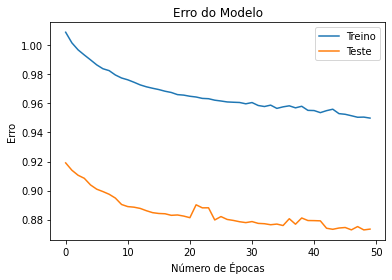

In [24]:
# plot
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Erro do Modelo')
plt.ylabel('Erro')
plt.xlabel('Número de Épocas')
plt.legend(['Treino', 'Teste'], loc='upper right');

Basicamente, treinamos o modelo nos dados de treino e aplicamos nos dados de teste e comparamos as performances e podemos observar que a diferença do resultado entre treino e o teste é pequena, isso mostra que o modelo está performando bem, se caso a diferença fosse grande, poderia ser que o modelo estaria com overfitting ou underfitting.

Mesmo tendo essa performance, poderiamos criar outras versões e comparar e também alterar os hiperparâmetros para ver se temos uma performance melhor.

Então, vamos fazer as previsões para o nosso modelo.

### 4.3 Calculando o Fraud Score 2

In [25]:
# realizando as previsões
previsoes = autoencoder.predict(df_pca)

# verificando as previsões
previsoes

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.5235331 , 5.9860096 , 4.878671  , ..., 0.        , 0.        ,
        0.        ],
       [0.088135  , 0.24214554, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

Como não temos uma saída, o modelo autoencoder compacta a entrada com os dados do pca, que foram os dados de entrada, o modelo então descompacta e essa descompactação é a saída gerada, que deveria ser o mesmo da entrada, mas geralmente não é, pois os modelos em geral tem uma taxa de erro e como analisamos esse, no gráfico acima, o erro é aceitável.

Vamos colocar as previsões no dataframe.

In [26]:
# criando o dataframe com as previsões
df_previsoes = pd.DataFrame(previsoes, columns=cols_PCA)

# visualizando as primeiras linhas
df_previsoes.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
1,1.523533,5.986010,4.878671,0.0,0.177548,0.000000,0.0,0.0,0.0,0.000000
2,0.088135,0.242146,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,2.126515,0.0,0.0,0.0,7.109409


In [27]:
# verificando as dimensões
df_previsoes.shape

(1070994, 10)

Então vamos criar um dataframe de zeros que em seguida receberá a diferença entre os valores das previsões e o pca normalizado na escala z, que é o valor real, ou seja, o erro da previsão e isso elevado ao quadrado.

O cálculo para o score 2 será definido tirando a raiz quadrada da soma dos valores do PCA desse novo dataframe.

In [28]:
# criando o dataframe
df_autoencod = pd.DataFrame(0, index=np.arange(len(df_previsoes)), columns = cols_PCA)

# looping
for i in range(0, 10):
    df_autoencod.iloc[:, i] = (df_previsoes.iloc[:, i] - df_pca_scaled_z.iloc[:, i]) ** 2
    
# calculando o score 2
df_autoencod['Fraud Score 2'] = df_autoencod[cols_PCA].sum(axis=1) ** (1/2)

# visualizando as primeiras linhas
df_autoencod.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,Fraud Score 2
0,0.001990,0.007166,0.001627,0.002023,0.003187,0.014521,0.001428,0.000049,0.008715,0.003959,0.211343
1,0.421691,20.858268,0.471015,2.151928,9.236137,28.722446,0.274157,0.147776,278.775927,12.480257,18.802649
2,0.006305,0.019170,0.000018,0.003105,0.000376,0.015951,0.000752,0.003438,0.303052,0.024181,0.613472
3,0.002786,0.004690,0.009365,0.005942,0.003218,0.003717,0.007917,0.000114,0.050576,0.005890,0.306946
4,104.038733,13.451864,43.387278,47.930008,319.134642,3.563724,238.177402,143.953732,10.077015,8.258833,30.528237


Colocamos o Score 2 no dataframe original.

In [29]:
# mesclando os dataframes
df_score2 = pd.merge(df_score1.iloc[:, 1:], df_autoencod.iloc[:, -1], left_index=True, right_index=True)

# visualizando as primeiras linhas
df_score2.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,ind2_media_ind2_grupo_ALL,ind3_media_ind3_grupo_ALL,ind4_media_ind4_grupo_ALL,ind5_media_ind5_grupo_ALL,ind6_media_ind6_grupo_ALL,ind7_media_ind7_grupo_ALL,ind8_media_ind8_grupo_ALL,ind9_media_ind9_grupo_ALL,Fraud Score 1,Fraud Score 2
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,...,0.290093,0.155256,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614,0.211343,0.211343
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,...,2.627102,5.624045,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196,21.858621,18.802649
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,...,0.431099,0.307629,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538,0.601415,0.613472
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.0,...,1.378254,1.475269,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571,0.306946,0.306946
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.0,...,88.388624,189.220556,26.809043,540.926631,997.873441,9.820611,319.351382,701.536801,32.185868,30.528237


Observamos que em algumas situações os scores 1 e 2 são próximos e em outros casos não, e isso é devido ao erro aceitável do nosso modelo, que poderíamos tentar melhorar se desejássemos.

Mas como saber se o nosso modelo está correto, ou seja, como saber se realmente esses valores do score representam, de fato, uma fraude?

Quem deveria nos ajudar com isso são os tomadores de decisão ou conhecedores do negócio, checar se a transação com os valores mais altos são uma fraude na realidade ou ainda usar como uma referência, uma idéia geral podendo até aumentar eventualmente os valores, seja de seguro ou outra coisa, pelo risco ser alto de fraude, por exemplo.

## 5. Calculando o Score Final do Score de Fraude e apresentando os Resultados

Chegando ao final deste projeto, calcularemos então o Score Final, pois já calculamos dois scores e poderíamos inclusive calcular outros scores com outros algoritmos, mas isso irá acarretar em aumento do tempo de projeto e muitas das vezes vai depender da equipe de negócios.

Antes vamos calcular o RANK, com um método do pacote pandas, ele basicamente encontra o padrão linear de uma matriz para depois calcularmos o score final.

In [30]:
# criando uma cópia do dataframe
df_fraudes = df_score2.copy()

Primeiro será calculado o rank do score 1 e na sequencia o rank do score 2.

In [31]:
# calculando o rank do score 1
df_fraudes['Rank_Fraud_Score 1'] = df_fraudes['Fraud Score 1'].rank(ascending=True, method='first')

# visualizando as primeiras linhas
df_fraudes.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,ind3_media_ind3_grupo_ALL,ind4_media_ind4_grupo_ALL,ind5_media_ind5_grupo_ALL,ind6_media_ind6_grupo_ALL,ind7_media_ind7_grupo_ALL,ind8_media_ind8_grupo_ALL,ind9_media_ind9_grupo_ALL,Fraud Score 1,Fraud Score 2,Rank_Fraud_Score 1
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,...,0.155256,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614,0.211343,0.211343,741726.0
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,...,5.624045,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196,21.858621,18.802649,1070274.0
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,...,0.307629,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538,0.601415,0.613472,1023940.0
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.0,...,1.475269,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571,0.306946,0.306946,964205.0
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.0,...,189.220556,26.809043,540.926631,997.873441,9.820611,319.351382,701.536801,32.185868,30.528237,1070373.0


In [32]:
# calculando o rank do score 2
df_fraudes['Rank_Fraud_Score 2'] = df_fraudes['Fraud Score 2'].rank(ascending=True, method='first')

# visualizando as primeiras linhas
df_fraudes.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,ind4_media_ind4_grupo_ALL,ind5_media_ind5_grupo_ALL,ind6_media_ind6_grupo_ALL,ind7_media_ind7_grupo_ALL,ind8_media_ind8_grupo_ALL,ind9_media_ind9_grupo_ALL,Fraud Score 1,Fraud Score 2,Rank_Fraud_Score 1,Rank_Fraud_Score 2
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,...,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614,0.211343,0.211343,741726.0,751097.0
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,...,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196,21.858621,18.802649,1070274.0,1070241.0
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,...,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538,0.601415,0.613472,1023940.0,1029406.0
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.0,...,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571,0.306946,0.306946,964205.0,973004.0
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.0,...,26.809043,540.926631,997.873441,9.820611,319.351382,701.536801,32.185868,30.528237,1070373.0,1070483.0


Então vamos organizar os dados, ordenando pela coluna do rank score 1.

In [33]:
# organizando os dados e visualizando o rank encontrado
df_fraudes.sort_values('Rank_Fraud_Score 1', ascending=False).head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,ind4_media_ind4_grupo_ALL,ind5_media_ind5_grupo_ALL,ind6_media_ind6_grupo_ALL,ind7_media_ind7_grupo_ALL,ind8_media_ind8_grupo_ALL,ind9_media_ind9_grupo_ALL,Fraud Score 1,Fraud Score 2,Rank_Fraud_Score 1,Rank_Fraud_Score 2
632815,632816,4018420001,4,1842,1,NaN,"864163 REALTY, LLC",D9,2,157.0,...,7.967947,29889.494191,55138.591300,2.883423,17432.257841,38294.402650,1024.704964,1017.335544,1070994.0,1070994.0
565391,565392,3085900700,3,8590,700,NaN,U S GOVERNMENT OWNRD,V9,4,117.0,...,13887.033346,42436.016445,39141.882967,5025.407821,24749.685481,27184.499848,914.747669,906.029709,1070993.0,1070993.0
917941,917942,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910.0,...,329.110772,19353.216175,11900.603717,310.119810,29390.962040,21521.582668,870.174399,854.836500,1070992.0,1070991.0
132748,132749,1018750046E,1,1875,46,E,CNY/NYCTA,U7,3,2.0,...,14398.937468,0.724285,0.668061,5210.654512,0.422420,0.463977,866.911467,855.494977,1070991.0,1070992.0
1067359,1067360,5078530085,5,7853,85,NaN,NaN,B2,1,1.0,...,2595.864783,0.403010,0.371726,1636.096590,0.409370,0.449643,830.451034,808.180563,1070990.0,1070990.0


Finalamente calculando o Score Final e salvando em disco.

In [ ]:
# calculando o score final
df_fraudes['Final Score'] = (df_fraudes['Fraud Score 1'] * df_fraudes['Rank_Fraud_Score 1']) + (df_fraudes['Fraud Score 2'] * df_fraudes['Rank_Fraud_Score 2'])

# calculando o rank do score final
df_fraudes['Final Rank'] = df_fraudes['Final Score'].rank(ascending=False, method='first')

# ordenando no dataframe
df_fraudes_final = df_fraudes.sort_values('Final Rank', ascending=True)

# salvando em disco
df_fraudes_final.to_csv('Dados/df_fraudes_final.csv')

# analisando o resultado com os primeiros
df_fraudes_final.head(20)

## 6. Conclusão

O entregável desse projeto é entregar ao tomador de decisão o Score Final que indica uma possível fraude na transação, nesse caso imobiliária, podendo ter sido de compra ou venda de imóvel, passado uma titularidade de um proprietário para outro, entre outras.

Cada registro possui uma pontuação que poderá ser usado para uma análise, investigação e eventualmente um aumento do seguro, há inúmeras possibilidades.

Nosso próximo passo será criar um relatório em Power BI para deixar uma forma mais apresentável para os tomadores de decisão.

Um ponto importante à ressaltar é que o objetivo não é realizar previsões futuras e sim olhar para o histórico de transações e ajudar a empresa com uma possível fraude em algumas das transações, sendo possível ser usado pela Receita Federal ou algum Órgão Público, por exemplos, interessado em detectar eventuais problemas no setor imobiliário (neste caso).

## 7. Referências

Mini-projeto de estudo do curso de Business Analytics<br>
https://www.datascienceacademy.com.br/

Soluções em detecção de fraudes<br>
https://www.kdnuggets.com/solutions/fraud-detection.html

The Cutting Edge: Network Analytics for Financial Fraud Detection and Mitigation<br>
http://www.analyticbridge.com/profiles/blogs/the-cutting-edge-network-analytics-for-financial-fraud-detection

Conceito da matrix-rank<br>
https://www.mathsisfun.com/algebra/matrix-rank.html

Documentação da método rank do pandas<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html